In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [2]:
TRAIN_DATA_PATH = '/content/california_housing_train.csv'
TEST_DATA_PATH = '/content/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [3]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [4]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled


In [6]:
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [7]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [9]:
# build the model
model = build_model_using_sequential()

In [10]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [11]:
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 3s 8ms/step - loss: 5.2724 - mean_squared_logarithmic_error: 5.2608 - val_loss: 0.5997 - val_mean_squared_logarithmic_error: 0.5969
Epoch 2/10
213/213 [==============================] - 2s 7ms/step - loss: 0.2508 - mean_squared_logarithmic_error: 0.2506 - val_loss: 0.3527 - val_mean_squared_logarithmic_error: 0.3578
Epoch 3/10
213/213 [==============================] - 2s 7ms/step - loss: 0.1893 - mean_squared_logarithmic_error: 0.1891 - val_loss: 0.2631 - val_mean_squared_logarithmic_error: 0.2706
Epoch 4/10
213/213 [==============================] - 2s 7ms/step - loss: 0.1521 - mean_squared_logarithmic_error: 0.1520 - val_loss: 0.1942 - val_mean_squared_logarithmic_error: 0.2029
Epoch 5/10
213/213 [==============================] - 1s 7ms/step - loss: 0.1264 - mean_squared_logarithmic_error: 0.1264 - val_loss: 0.1528 - val_mean_squared_logarithmic_error: 0.1605
Epoch 6/10
213/213 [==============================] - 1s 7ms/step - lo

In [12]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()


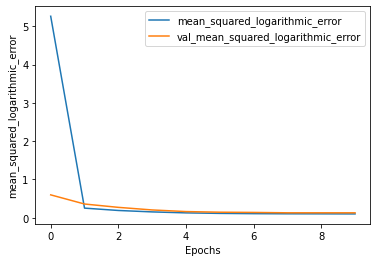

In [13]:
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [14]:
x_test['prediction'] = model.predict(x_test_scaled)

In [16]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,prediction
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,356721.781250
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,187384.093750
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,258384.609375
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,314104.656250
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,90617.843750
